In [1]:
# Convert COCO to YOLO

import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

from pylabel import importer

import os 
import pandas as pd
import shutil
from tqdm import tqdm


In [2]:
#Download sample  dataset 
os.makedirs("data", exist_ok=True)
# !wget "https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true" -O data/BCCD_coco.zip
# with zipfile.ZipFile("data/BCCD_coco.zip", 'r') as zip_ref:
#    zip_ref.extractall("data")

#Specify path to the coco.json file
path_to_annotations = '/Users/caraappel/Documents/CV4E/oregon_critters/json/adj_xy/dataset_300_split_adjXY.json'

#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/Users/caraappel/Documents/CV4E/"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images)
dataset.df.head(5)

img_folder  \
id                                     
0   /Users/caraappel/Documents/CV4E/   
1   /Users/caraappel/Documents/CV4E/   
2   /Users/caraappel/Documents/CV4E/   
3   /Users/caraappel/Documents/CV4E/   
4   /Users/caraappel/Documents/CV4E/   

                                         img_filename img_path  img_id  \
id                                                                       
0   data/COA_2019/COA2019_Bat/images/10316-5__2019...                1   
1   data/COA_2019/COA2019_Bat/images/10831-1__2019...                2   
2   data/COA_2019/COA2019_Bat/images/8749-3__2019-...                3   
3   data/COA_2019/COA2019_Bat/images/8749-3__2019-...                4   
4   data/COA_2019/COA2019_Bat/images/8749-3__2019-...                5   

    img_width  img_height img_depth ann_segmented  ann_bbox_xmin  \
id                                                                 
0        3840        2880                            1414.630021   
1        3840        2880                             107.568710   
2        3840        2880                             972.177590   
3        3840        2880                             740.803383   
4        3840        2880                             489.133192   

    ann_bbox_ymin  ...  ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  \
id                 ...                                                        
0     1792.900518  ...            0                                           
1      835.605219  ...            0                                           
2     1817.238534  ...            0                                           
3      774.760179  ...            0                                           
4     1947.041287  ...            0                                           

    ann_difficult cat_id  cat_name cat_supercategory split annotated  
id                                                                    
0                      1       Bat            object               1  
1                      1       Bat            object               1  
2                      1       Bat            object               1  
3                      1       Bat            object               1  
4                      1       Bat            object               1  

[5 rows x 26 columns]

In [3]:
# Analyze annotations
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 10510
Number of classes: 45
Classes:['Bat', 'CanadaJay', 'Coyote', 'PileatedWoodpecker', 'Owl', 'Mink', 'RedFox', 'Marten', 'AmericanRobin', 'DouglasSquirrel', 'FlyingSquirrel', 'Grouse', 'Invertebrate', 'MountainBeaver', 'OtherBird', 'SmallMammal', 'Warbler', 'Chickadee', 'MountainQuail', 'StripedSkunk', 'Human', 'Dog', 'BlackBear', 'BlackTailedDeer', 'Bobcat', 'Cougar', 'DarkEyedJunco', 'GraySquirrel', 'Herp', 'NorthernFlicker', 'Opossum', 'Rabbit', 'Racoon', 'RooseveltElk', 'SpottedSkunk', 'StellersJay', 'Thrush', 'TownsendsChipmunk', 'VariedThrush', 'Weasel', 'Woodpecker', 'Woodrat', 'Wren', 'GroundSquirrel', 'GrayFox']
Class counts:
cat_name
Human                 347
RooseveltElk          345
Grouse                327
Invertebrate          324
GrayFox               320
Cougar                319
Woodrat               314
Racoon                314
SpottedSkunk          308
StellersJay           307
OtherBird             305
BlackTailedDeer       305
TownsendsChipmu

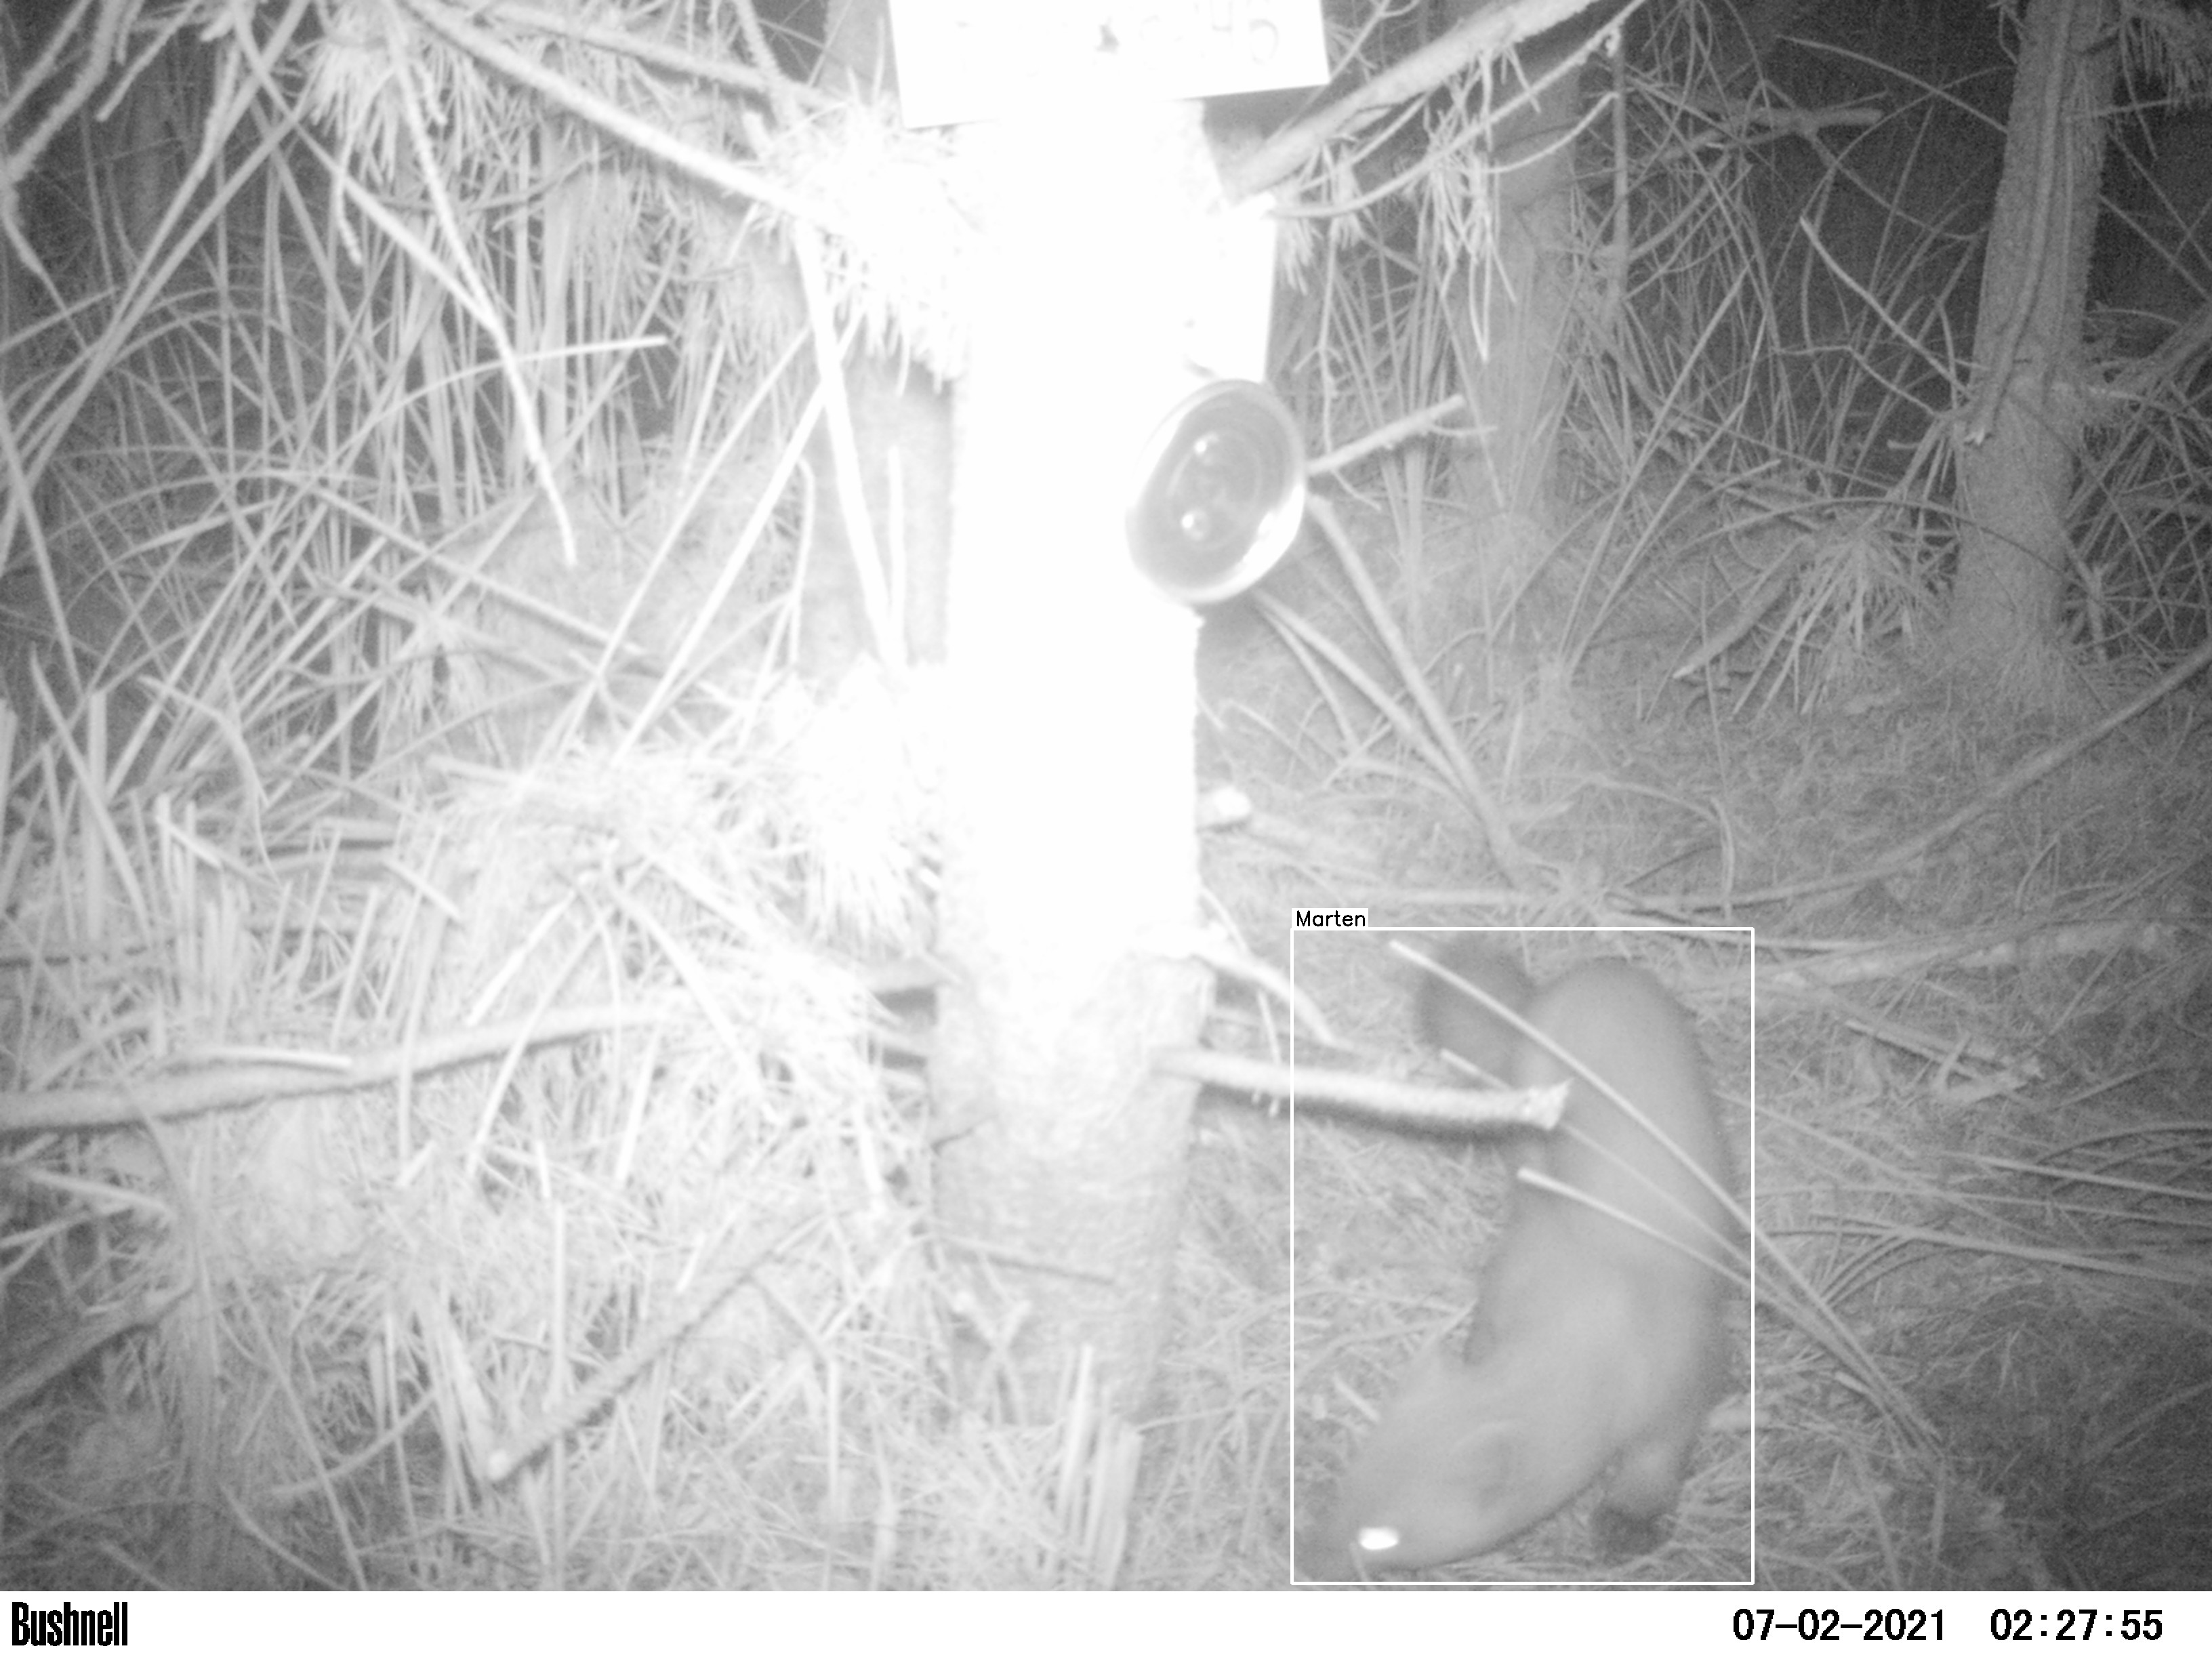

In [4]:
# Visualize annotations

from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
#display(dataset.visualize.ShowBoundingBoxes("BloodImage_00315.jpg"))

In [ ]:
# Export to YOLOv5 format

dataset.path_to_annotations = ""

txt_output = os.path('')

dataset.export.ExportToYoloV5(output_path = '',
                              copy_images=False,
                              cat_id_index=0)[0]